In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
us = pd.read_csv('ofac_sdn.csv',low_memory=False)
bis = pd.read_csv('us_bis.csv',low_memory=False)
cons = pd.read_csv('ofac_cons.csv',low_memory=False)

# descriptives

In [4]:
data = us.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'date_stamp', 'last_change',
       'listing_date', 'delisting_date', 'month', 'new_listing_count',
       'listing_count', 'iso', 'country_0', 'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1    Unnamed: 0    date_stamp  listing_date  delisting_date  \
count  41204.000000  41204.000000  4.120400e+04  4.120400e+04    1.990000e+03   
mean   20601.500000  14570.199956  2.021572e+07  2.021572e+07    2.022235e+07   
std    11894.714583   8220.362660  6.811643e+03  6.811643e+03    4.077634e+03   
min        0.000000      0.000000  2.021082e+07  2.021082e+07    2.021092e+07   
25%    10300.750000   7749.750000  2.021082e+07  2.021082e+07    2.022093e+07   
50%    20601.500000  14478.500000  2.021093e+07  2.021093e+07    2.022093e+07   
75%    30902.250000  21555.000000  2.022053e+07  2.022053e

In [5]:
data = bis.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'date_stamp', 'last_change',
       'listing_date', 'delisting_date', 'month', 'new_listing_count',
       'listing_count', 'iso', 'country_0', 'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1   Unnamed: 0  aliases  birth_date  identifiers  phones  \
count   3663.000000  3663.000000      0.0         0.0          0.0     0.0   
mean    1831.000000   740.292656      NaN         NaN          NaN     NaN   
std     1057.561346   441.632938      NaN         NaN          NaN     NaN   
min        0.000000     1.000000      NaN         NaN          NaN     NaN   
25%      915.500000   360.000000      NaN         NaN          NaN     NaN   
50%     1831.000000   716.000000      NaN         NaN          NaN     NaN   
75%     2746.500000  1150.000000      NaN         NaN          NaN     NaN   
m

In [6]:
data = cons.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'date_stamp', 'last_change',
       'listing_date', 'delisting_date', 'month', 'new_listing_count',
       'listing_count', 'iso', 'country_0', 'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1   Unnamed: 0  phones    date_stamp  listing_date  \
count    1206.00000  1206.000000     0.0  1.206000e+03  1.206000e+03   
mean      602.50000   514.002488     NaN  2.021163e+07  2.021163e+07   
std       348.28652   297.899979     NaN  2.694858e+03  2.694858e+03   
min         0.00000     0.000000     NaN  2.021082e+07  2.021082e+07   
25%       301.25000   263.250000     NaN  2.021082e+07  2.021082e+07   
50%       602.50000   487.000000     NaN  2.021092e+07  2.021092e+07   
75%       903.75000   786.750000     NaN  2.021093e+07  2.021093e+07   
max      1205.00000   955.000000     NaN  2.02311

# listings per month

<Axes: xlabel='month_id', ylabel='listing_count'>

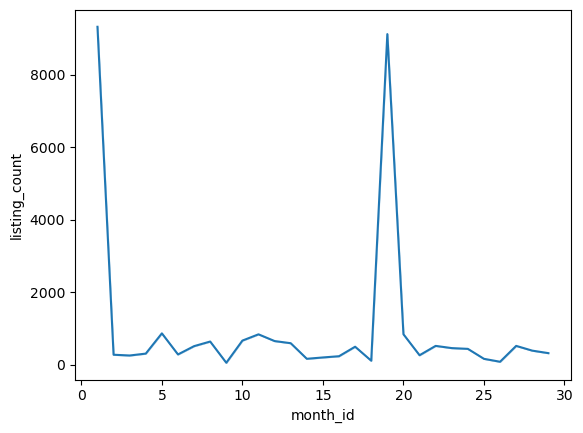

In [14]:
#get the listings per month
listings_us_sdn = sns.lineplot(data=us,x='month_id',y='new_listing_count')
listings_us_sdn

<Axes: xlabel='month_id', ylabel='new_listing_count'>

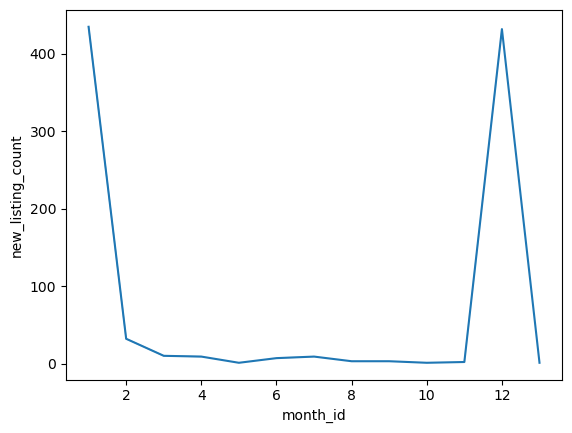

In [15]:
#get the listings per month
listings_us_cons = sns.lineplot(data=cons,x='month_id',y='new_listing_count')
listings_us_cons

<Axes: xlabel='month', ylabel='new_listing_count'>

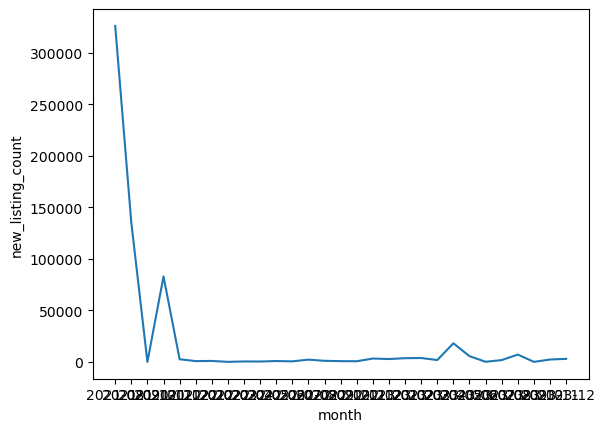

In [39]:
#get the listings per month
bis = bis.groupby(['month','listing_count']).sum().reset_index()
listings_us_bis = sns.lineplot(data=bis,x='month',y='new_listing_count')
listings_us_bis

In [17]:
# filter for russia

In [20]:
us.iso.unique()

array(['SYR', 'PAK', 'IRN', 'RUS', 'CUW', 'DZA', 'MEX', 'BEL', 'IRQ',
       'GRC', 'HKG', 'MAC', nan, 'SJM', 'ALA', 'VEN', 'LTU', 'COG', 'CYP',
       'AGO', 'KIR', 'VAT', 'GMB', 'LBR', 'TWN', 'MYS', 'YEM', 'ZAF',
       'GNQ', 'AUT', 'TTO', 'MLT', 'SEN', 'CRI', 'JOR', 'FRA', 'BES',
       'NCL', 'BGD', 'ITA', 'AUS', 'UZB', 'SSD', 'IOT', 'HTI', 'ECU',
       'LBY', 'PHL', 'ZMB', 'NER', 'AFG', 'SLV', 'TCD', 'BLZ', 'KEN',
       'GTM', 'THA', 'SGP', 'KGZ', 'EGY', 'KAZ', 'TGO', 'TZA', 'FIN',
       'WSM', 'PER', 'LVA', 'BWA', 'ESH', 'SYC', 'SOM', 'QAT', 'LUX',
       'OMN', 'MLI', 'LCA', 'AIA', 'MDA', 'BEN', 'UGA', 'CUB', 'CMR',
       'MAR', 'PRK', 'BHR', 'HUN', 'JAM', 'URY', 'MOZ', 'POL', 'PLW',
       'GIB', 'SMR', 'DEU', 'BLM', 'SLE', 'PRY', 'DNK', 'BDI', 'NOR',
       'IRL', 'RWA', 'NZL', 'BMU', 'HRV', 'BRB', 'ETH', 'GHA', 'BOL',
       'CHL', 'MMR', 'EST', 'MNE', 'COL', 'MAF', 'TUV'], dtype=object)

In [34]:
df_russia = us[us['iso']=='RUS']
df_russia

,Unnamed: 0.1,Unnamed: 0,id,schema,name,aliases,birth_date,countries,addresses,identifiers,...,last_change,listing_date,delisting_date,month,new_listing_count,listing_count,iso,country_0,year_id,month_id
4117,4117,4,NK-22oMG6jqPQknWaMjzTn4hK,Company,Limited Liability Company Garantiya,Garantiya OOO,NaN,ru,"bulvar Tverskoi, d. 15 str. 2, Moscow",5067746901426;7703610362,...,NaN,20230226,NaN,2023-02,668,668,RUS,ru,2023,10
4118,4118,6,NK-23p2d4vMT5sJtQ845GyzJt,Organization,Scientific and Production Association of Measu...,Aktsionernoe Obschestvo Nauchno Proizvodstvenn...,NaN,ru,"2k4 Pionerskaya Str., Korolyov, Moscow Region,...",1095018006555;5018139517,...,NaN,20220804,NaN,2022-08,166,166,RUS,ru,2022,14
4119,4119,17,NK-26KatzEr7TvuaQuVTYUvrJ,Person,Sang Jun JI,Sang-chun Chi,1971-05-03,ru,Moscow,NaN,...,NaN,20210930,NaN,2021-09,9326,9326,RUS,ru,2021,1
4120,4120,18,NK-26Pa7cjkCUudCi7EQPrc4g,Company,Общество С Ограниченной Ответственностью Основ...,Limited Liability Company Osnova Lab,NaN,ru,"Spartakovskaya square, house 14, building 2, M...",1157746344755;7701100976,...,NaN,20230226,NaN,2023-02,668,668,RUS,ru,2023,10
4121,4121,20,NK-272DTu3sMy6c8a5fZzmKRT,Company,Limited Liability Company Nikoliya,Nikoliya OOO,NaN,ru,"bulvar Tverskoi, d. 15 str. 2, Moscow",5147746404306;7710972620,...,NaN,20230226,NaN,2023-02,668,668,RUS,ru,2023,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,8941,28151,ofac-sdn-32851,Person,Владимир Александрович Паняев,Vladimir Aleksandrovich Panaiev;Vladimir Alexa...,1980-11-25,ru,"Moscow, Russia",NaN,...,NaN,20210820,NaN,2021-08,9124,9124,RUS,ru,2021,19
8942,8942,28162,ofac-sdn-32954,Organization,Joint Stock Company Nobility,Nobility JSC;АО Нобилити;Акционерное Общество ...,NaN,ru,"Bolshoy Sampsonievsky pr., 60, lit. A, pom. 2N...",1207800055341;7802706763,...,NaN,20210820,NaN,2021-08,9124,9124,RUS,ru,2021,19
8943,8943,28163,ofac-sdn-32971,Vessel,Ostap Sheremeta,NaN,NaN,ru,NaN,IMO 9624225;UBCS9,...,NaN,20210820,NaN,2021-08,9124,9124,RUS,ru,2021,19
8944,8944,28164,ofac-sdn-32972,Vessel,Ivan Sidorenko,NaN,NaN,ru,NaN,IMO 9624213;UHLC,...,NaN,20210820,NaN,2021-08,9124,9124,RUS,ru,2021,19
